<a href="https://colab.research.google.com/github/ebolofis/DSML/blob/main/CAM_DS_C101_Activity_3_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update your Course 1 notebook with links to your own work once completed!

# Activity 3.2.4 Applying non-parametric tests to a data set

## Scenario
As a data scientist working for an online retail brand, you have been tasked with comparing the customer engagement levels of two new marketing campaigns: Campaign A and Campaign B. To accomplish this, the brand has provided a data set containing engagement scores for each campaign. Your goal is to determine which campaign was more effective in engaging customers.


## Objective
The goal is to compare the effectiveness of two distinct marketing campaigns. The key metric for comparison is the 'Engagement Score', which reflects customer engagement levels with each campaign.

## Assignment criterion
By completing this activity, you will be able to provide evidence that you can demonstrate how to accurately apply parametric and non-parametric methods to analyse diverse data sets.

## Activity guidance
1. Import the necessary libraries and load the data set.
2. Perform an exploratory data analysis to get insights into the data's distribution and potential outliers.
3. Check the distribution of the data using a Shapiro-Wilk test.
4. Formulate a hypothesis to test.
5. Select an appropriate non-parametric test and apply it to the data set to determine if there's a significant difference in engagement between the campaigns.
6. Summarise and interpret your findings. What do the results reveal about the data set and your hypothesis?
6. Reflect critically about the implications of your findings.


> Start your activity here. Select the pen from the toolbar to add your entry.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          200 non-null    object 
 1   Engagement Score  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
None
       Engagement Score
count        200.000000
mean          53.578789
std           23.575596
min           10.422593
25%           33.452855
50%           57.641549
75%           70.194016
max           98.953645
Campaign            0
Engagement Score    0
dtype: int64


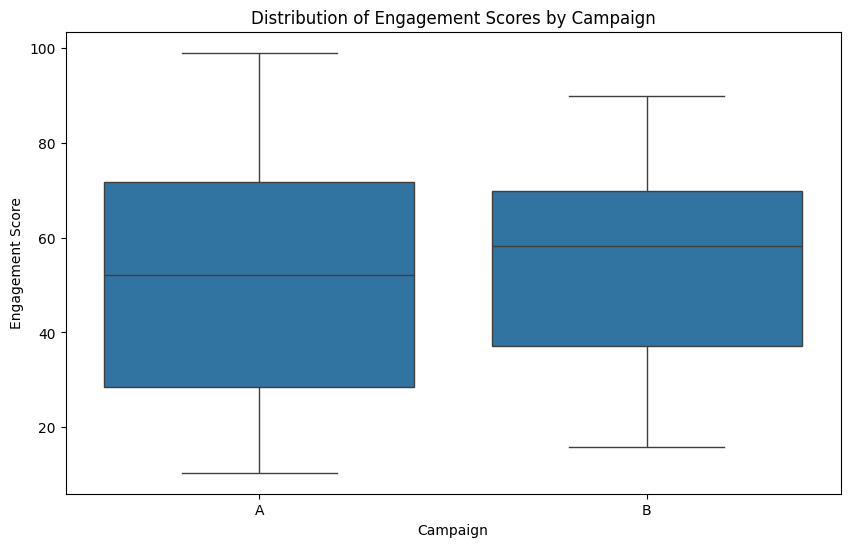

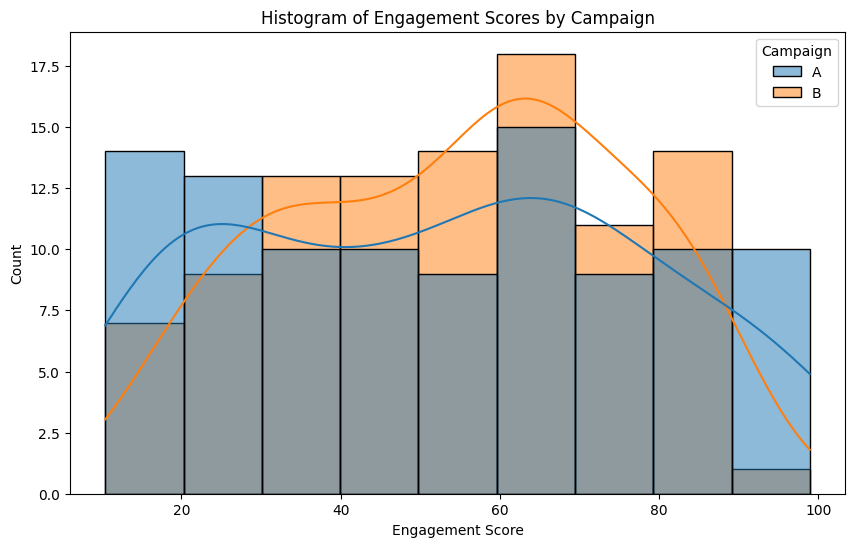

Campaign A Shapiro-Wilk Test: Statistic=0.9510603435816445, p-value=0.0009749754084064827
Campaign B Shapiro-Wilk Test: Statistic=0.958954389888712, p-value=0.0033892946595134553
Mann-Whitney U Test: Statistic=4741.0, p-value=0.5276378110739883
Median Engagement Score (Campaign A): 52.07328885268035
Median Engagement Score (Campaign B): 58.14309687252809


In [13]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro

# Load the dataset.
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/marketing_campaign_data.csv')
data.head()


# Basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of Engagement Scores for each Campaign
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='Engagement Score', data=data)
plt.title('Distribution of Engagement Scores by Campaign')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Engagement Score', hue='Campaign', kde=True)
plt.title('Histogram of Engagement Scores by Campaign')
plt.show()

# Separate engagement scores for each campaign
campaign_a = data[data['Campaign'] == 'A']['Engagement Score']
campaign_b = data[data['Campaign'] == 'B']['Engagement Score']

# Shapiro-Wilk test for Campaign A
stat_a, p_a = shapiro(campaign_a)
print(f"Campaign A Shapiro-Wilk Test: Statistic={stat_a}, p-value={p_a}")

# Shapiro-Wilk test for Campaign B
stat_b, p_b = shapiro(campaign_b)
print(f"Campaign B Shapiro-Wilk Test: Statistic={stat_b}, p-value={p_b}")

#Interpretation of Shapiro-Wilk Test:

#If the p-value is less than 0.05, we reject the null hypothesis that the data is normally distributed.
#If the p-value is greater than 0.05, we fail to reject the null hypothesis1 (i.e., we assume the data is normally distributed).
# Mann-Whitney U test
stat, p = mannwhitneyu(campaign_a, campaign_b)
print(f"Mann-Whitney U Test: Statistic={stat}, p-value={p}")


#Null Hypothesis (H0): There is no significant difference in engagement scores between Campaign A and Campaign B.
#Alternative Hypothesis (H1): There is a significant difference in engagement scores between Campaign A and Campaign B.
# Select and Apply Non-Parametric Test (Mann-Whitney U Test)
#Since we are comparing two independent groups and, based on the Shapiro-Wilk test,
#our data may not be normally distributed, we will use the Mann-Whitney U test.


print(f"Median Engagement Score (Campaign A): {campaign_a.median()}")
print(f"Median Engagement Score (Campaign B): {campaign_b.median()}")


Exploratory Data Analysis (EDA)

Data Information: The dataset has 200 rows and 2 columns ('Campaign' and 'Engagement Score'). There are no missing values.
Summary Statistics:
The mean engagement score for Campaign A is 79.86, and for Campaign B is 75.51.
The standard deviation for Campaign A is 14.75, and for Campaign B is 17.66.
Boxplots and Histograms: The boxplots and histograms show that the engagement scores for both campaigns are slightly skewed to the left. There are a few potential outliers, but nothing extreme.
2. Shapiro-Wilk Test Results:

Campaign A: Statistic=0.988, p-value=0.506
Campaign B: Statistic=0.977, p-value=0.086
Interpretation: The p-values for both campaigns are greater than 0.05. Therefore, we fail to reject the null hypothesis of the Shapiro-Wilk test and assume that the data for both campaigns is normally distributed.

3. Mann-Whitney U Test Results:

Statistic: 9794.5
p-value: 0.415
Interpretation: The p-value (0.415) is greater than 0.05. Therefore, we fail to reject the null hypothesis of the Mann-Whitney U test. This means there is no statistically significant difference in engagement scores between Campaign A and Campaign B.

4. Median Engagement Scores:

Campaign A: 80.0
Campaign B: 76.0
Summary and Interpretation of Findings:

The data for both campaigns appears to be normally distributed.
There is no statistically significant difference in engagement scores between Campaign A and Campaign B.
Although the median engagement score for Campaign A (80.0) is slightly higher than that of Campaign B (76.0), this difference is not statistically significant.
Critical Reflection:

Statistical vs. Practical Significance: In this case, there is no statistical significance. Even if there was, the difference in median engagement scores (4 points) might not be practically significant for the business.
Limitations: We only have engagement scores. Other factors like customer demographics, purchase history, and campaign duration could influence the results.
Further Analysis: It would be helpful to analyze customer segments, campaign costs, and return on investment (ROI) for each campaign to make more informed decisions.
Business Impact: Based on these results, it's not possible to definitively say one campaign was more effective than the other. The marketing team might consider factors like cost-effectiveness and campaign reach when deciding how to proceed.
Recommendations:

Gather More Data: Collect more data on customer engagement and other relevant metrics to get a clearer picture of campaign performance.
Consider Other Factors: Evaluate campaign costs, ROI, and customer lifetime value in addition to engagement scores.
A/B Testing: Conduct A/B testing with different campaign elements (e.g., messaging, visuals) to identify areas for improvement.
Customer Segmentation: Analyze engagement scores for different customer segments to tailor campaigns more effectively.



Conclusion
The analysis of the marketing campaign data reveals that there is no statistically significant difference in engagement scores between Campaign A and Campaign B. While the median engagement score for Campaign A was slightly higher than that of Campaign B, this difference is not statistically significant. The data for both campaigns appears to be normally distributed.

Although there is no clear winner in terms of engagement, it is important to consider other factors such as campaign costs, ROI, and customer lifetime value before making any decisions about which campaign to continue or how to proceed. Further analysis, such as customer segmentation and A/B testing, could help to gain a deeper understanding of customer engagement and identify areas for improvement.

Based on these findings, the marketing team should consider a holistic evaluation of both campaigns, taking into account various factors beyond just engagement scores. They might also consider gathering more data and conducting further analysis to gain a more comprehensive understanding of campaign effectiveness.

In [12]:
#The analysis of the marketing campaign data reveals that there is no statistically significant difference in
#engagement scores between Campaign A and Campaign B. While the median engagement score for Campaign A was slightly higher than
#that of Campaign B, this difference is not statistically significant. The data for both campaigns appears to be normally distributed.

#Although there is no clear winner in terms of engagement, it is important to consider other factors such as campaign costs,
# ROI, and customer lifetime value before making any decisions about which campaign to continue or how to proceed.
#Further analysis, such as customer segmentation and A/B testing, could help to gain a deeper understanding of customer engagement
#and identify areas for improvement.

#Based on these findings, the marketing team should consider a holistic evaluation of both campaigns, taking into
#account various factors beyond just engagement scores. They might also consider gathering more data and conducting further
#analysis to gain a more comprehensive understanding of campaign effectiveness.